# Import Libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Dataset

In [47]:
ld = pd.read_csv("/content/loan_data_2007_2014.csv")

In [48]:
#Melihat semua Kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [49]:
#Info Kolom
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224898 entries, 0 to 224897
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   224898 non-null  int64  
 1   id                           224898 non-null  int64  
 2   member_id                    224898 non-null  int64  
 3   loan_amnt                    224898 non-null  int64  
 4   funded_amnt                  224898 non-null  int64  
 5   funded_amnt_inv              224898 non-null  float64
 6   term                         224898 non-null  object 
 7   int_rate                     224898 non-null  float64
 8   installment                  224898 non-null  float64
 9   grade                        224898 non-null  object 
 10  sub_grade                    224898 non-null  object 
 11  emp_title                    211015 non-null  object 
 12  emp_length                   216119 non-null  object 
 13 

Pengamatan:
1. Data terdiri dari 420822 Baris dan 75 Kolom
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)



In [50]:
ld.shape

(224898, 75)

In [51]:
ld_nc = ld.drop(['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
      'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
      'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
      'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m','max_bal_bc',
      'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code','issue_d','addr_state','earliest_cr_line','last_credit_pull_d','last_pymnt_d'], axis=1)
ld_nc.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,27.65,0.0,1.0,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,861.07,171.62,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,1.00,0.0,5.0,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,435.17,119.66,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,8.72,0.0,2.0,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,603.65,649.91,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,20.00,0.0,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,2209.33,357.48,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,n,other,17.94,0.0,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,1009.07,67.79,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [52]:
ld_nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224898 entries, 0 to 224897
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  224898 non-null  int64  
 1   loan_amnt                   224898 non-null  int64  
 2   funded_amnt                 224898 non-null  int64  
 3   funded_amnt_inv             224898 non-null  float64
 4   term                        224898 non-null  object 
 5   int_rate                    224898 non-null  float64
 6   installment                 224898 non-null  float64
 7   grade                       224898 non-null  object 
 8   emp_length                  216119 non-null  object 
 9   home_ownership              224898 non-null  object 
 10  annual_inc                  224894 non-null  float64
 11  verification_status         224898 non-null  object 
 12  loan_status                 224898 non-null  object 
 13  pymnt_plan    

## Statistical Summary

In [53]:
#pengelompokan kolom berdasarkan jenisnya
nums = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_int','last_pymnt_amnt','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']
cats = ['term', 'grade','emp_length','home_ownership','verification_status','pymnt_plan','purpose','initial_list_status','application_type','loan_status']

In [54]:
#Descrihe pada kolo-kolom bertipe Numerik
ld_nc[nums].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,224898.000000,224898.000000,224898.000000,224898.000000,224898.000000,2.248940e+05,224897.000000,224868.000000,224868.000000,94450.000000,224868.000000,224868.000000,2.248970e+05,224693.000000,224868.000000,224897.000000,224897.000000,224897.000000,224897.000000,224897.000000,224897.000000,224752.000000,224868.000000,160381.000000,1.603810e+05,1.603810e+05
mean,13752.858407,13701.015238,13563.193607,13.922385,421.427551,7.174645e+04,16.427604,0.226359,0.855235,34.913097,10.723104,0.099080,1.597911e+04,56.664590,24.149666,1806.870814,1805.697097,13645.246900,13502.840689,2894.090390,3491.211438,0.002656,0.002290,76.746996,1.373311e+05,2.989417e+04
std,8085.563248,8056.773274,8099.690597,4.388698,241.266444,5.457898e+04,7.600878,0.678227,1.149029,21.746453,4.642957,0.385967,1.997699e+04,24.319493,11.222196,4073.418634,4071.284191,8888.944475,8902.498472,2890.836172,5552.084390,0.054166,0.053591,859.802893,1.507590e+05,3.777515e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,7500.000000,7500.000000,7250.000000,10.990000,244.970000,4.500000e+04,10.740000,0.000000,0.000000,17.000000,7.000000,0.000000,6.487000e+03,39.700000,16.000000,0.000000,0.000000,7049.683386,6922.440000,1020.640000,328.160000,0.000000,0.000000,0.000000,2.747100e+04,1.390000e+04
50%,12000.000000,12000.000000,12000.000000,13.680000,374.540000,6.100000e+04,16.180000,0.000000,0.000000,32.000000,10.000000,0.000000,1.184300e+04,58.900000,23.000000,0.000000,0.000000,11738.240000,11628.220000,1955.010000,644.080000,0.000000,0.000000,0.000000,8.076500e+04,2.300000e+04
75%,19193.750000,19000.000000,18875.000000,16.820000,553.087500,8.600000e+04,21.880000,0.000000,1.000000,50.000000,13.000000,0.000000,2.017200e+04,76.000000,31.000000,1304.290000,1303.540000,18221.110000,18086.800000,3640.080000,4615.470000,0.000000,0.000000,0.000000,2.081860e+05,3.720000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,34.990000,29.000000,33.000000,156.000000,62.000000,54.000000,2.568995e+06,140.400000,105.000000,27631.060000,27631.060000,57777.579870,57777.580000,24205.620000,36115.200000,4.000000,5.000000,88303.000000,8.000078e+06,9.999999e+06


In [55]:
#Descrihe pada kolo-kolom bertipe Kategorik
ld_nc[cats].describe()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,loan_status
count,224898,224898,216119,224898,224898,224898,224898,224897,224897,224898
unique,2,7,11,5,3,2,15,2,1,9
top,36 months,B,10+ years,MORTGAGE,Verified,n,debt_consolidation,f,INDIVIDUAL,Fully Paid
freq,170767,73176,69079,113566,98799,224893,128104,185090,224897,125551


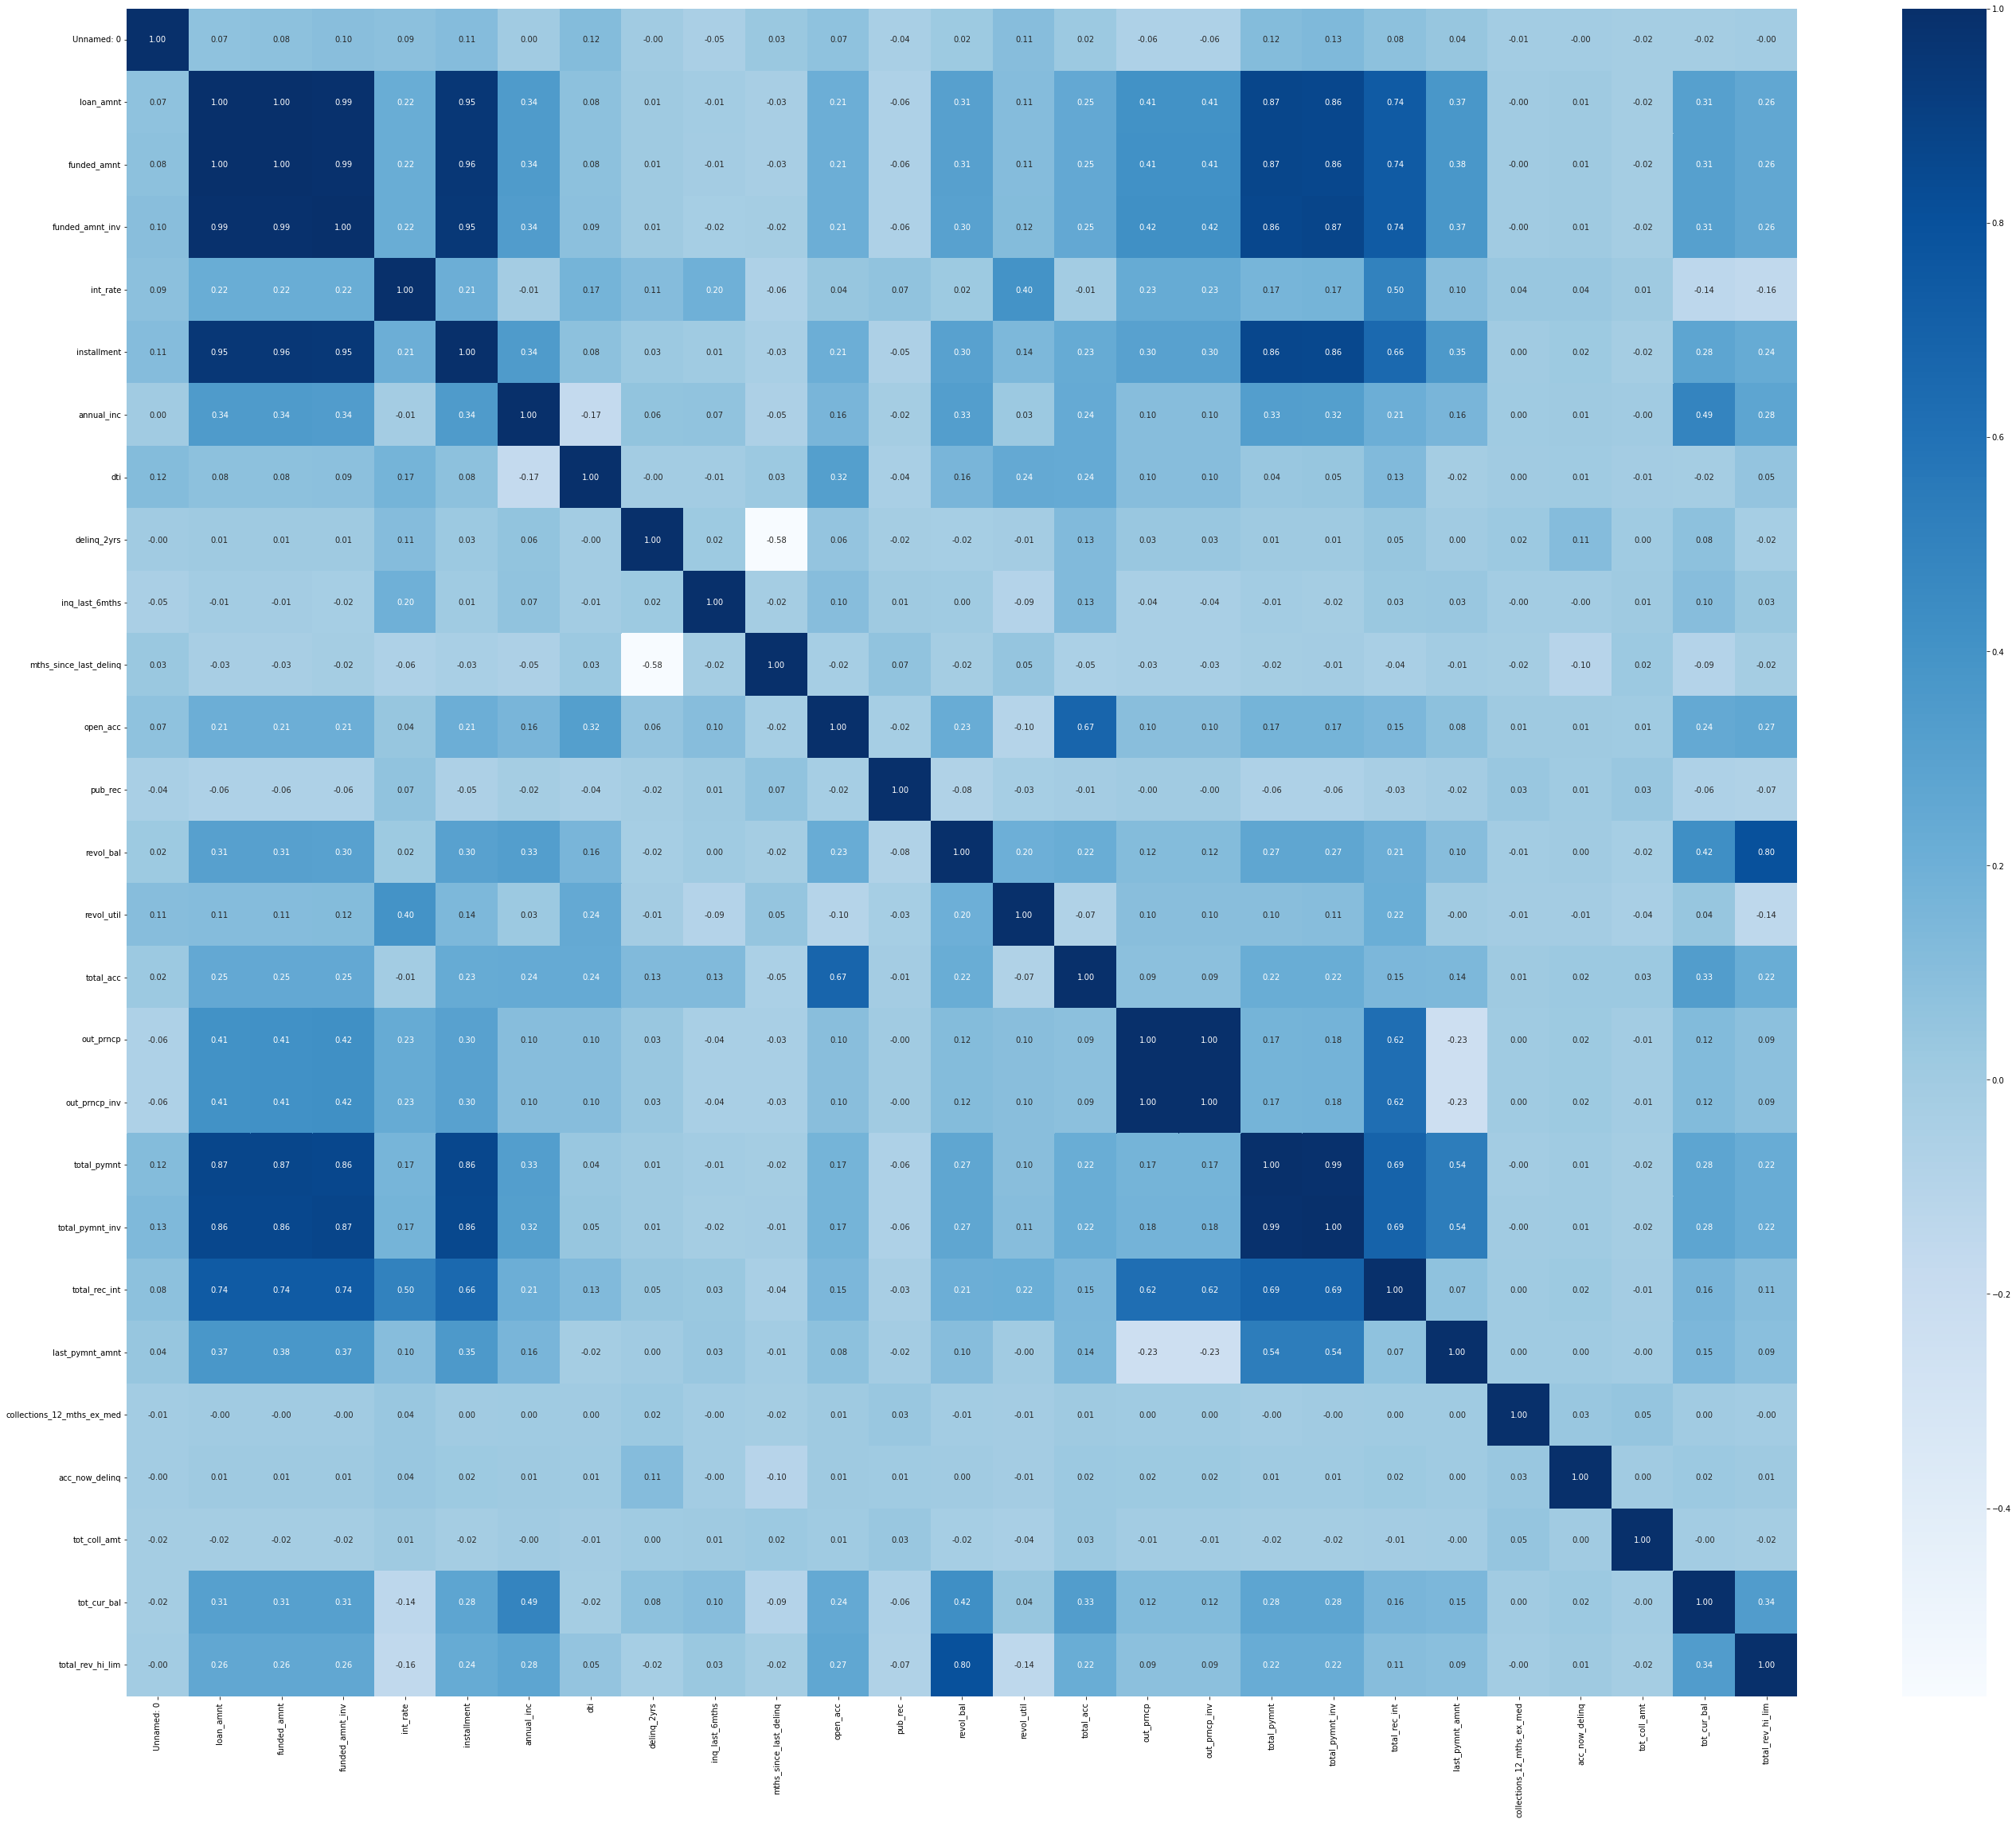

In [56]:
plt.figure(figsize=(47,39))
sns.heatmap(ld_nc.corr(), cmap='Blues', annot=True ,fmt='.2f')

#Cuplikan Data

In [57]:
ld_nc.sample(5)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
85227,85227,7000,7000,7000.0,60 months,20.20,186.24,D,5 years,OWN,56250.0,Verified,Charged Off,n,debt_consolidation,17.26,0.0,0.0,38.0,13.0,1.0,5003.0,21.9,26.0,f,0.00,0.00,2758.85,2758.85,1124.02,186.24,0.0,INDIVIDUAL,0.0,274.0,164601.0,22800.0
74107,74107,23850,23850,23850.0,60 months,15.61,575.06,C,NaN,OWN,53000.0,Verified,Current,n,credit_card,26.31,0.0,0.0,66.0,10.0,0.0,37750.0,85.0,24.0,f,15719.65,15719.65,14951.50,14951.50,6821.15,575.06,0.0,INDIVIDUAL,0.0,0.0,63584.0,44400.0
79576,79576,22000,22000,22000.0,60 months,9.99,467.33,B,NaN,MORTGAGE,60000.0,Verified,Current,n,debt_consolidation,13.00,1.0,1.0,23.0,9.0,0.0,6628.0,39.5,21.0,f,13437.38,13437.38,12615.91,12615.91,4053.29,467.33,0.0,INDIVIDUAL,0.0,0.0,75475.0,16800.0
36659,36659,3000,3000,3000.0,36 months,13.47,101.77,C,< 1 year,RENT,48000.0,Not Verified,Fully Paid,n,credit_card,7.08,0.0,0.0,NaN,5.0,0.0,2660.0,66.5,5.0,f,0.00,0.00,3612.85,3612.85,612.85,15.12,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
57656,57656,11500,11500,11450.0,36 months,12.99,387.43,B,10+ years,MORTGAGE,65192.0,Verified,Current,n,debt_consolidation,33.69,2.0,0.0,10.0,13.0,0.0,14444.0,56.9,40.0,f,3998.42,3981.03,9684.04,9641.94,2182.46,387.43,0.0,INDIVIDUAL,0.0,0.0,163906.0,25400.0


# Data Preparation

## Missing Data

In [58]:
#Mengecek Missing Data
ld_nc.isnull().sum()

Unnamed: 0                         0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
emp_length                      8779
home_ownership                     0
annual_inc                         4
verification_status                0
loan_status                        0
pymnt_plan                         0
purpose                            0
dti                                1
delinq_2yrs                       30
inq_last_6mths                    30
mths_since_last_delinq        130448
open_acc                          30
pub_rec                           30
revol_bal                          1
revol_util                       205
total_acc                         30
initial_list_status                1
out_prncp                          1
out_prncp_inv                      1
t

In [59]:
#Drop kolom dengan Missing Values
ld_new = ld_nc.dropna(axis=1,how='all')

In [60]:
#Drop baris dengan Missing Values
ld_new2 = ld_new.dropna(axis=0, how='any')

In [61]:
#Pengecekan kembali Missing Values
ld_new2.isnull().sum()

Unnamed: 0                    0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_int                 0
last_pymnt_amnt               0
collecti

## Duplicated Data

In [62]:
#Mengecek Data Duplikat
ld_new2.duplicated().sum()

0

Dataset tidak memiliki data yang duplikat

## Feature Encoding

Melihat Nilai Unik dari Kolom bertipe Kategori

In [64]:
ld_new2['emp_length'].unique()

array(['10+ years', '2 years', '4 years', '7 years', '6 years', '5 years',
       '8 years', '3 years', '1 year', '< 1 year', '9 years'],
      dtype=object)

In [65]:
ld_new2['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [66]:
ld_new2['grade'].unique()

array(['A', 'B', 'D', 'C', 'E', 'G', 'F'], dtype=object)

In [67]:
ld_new2['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'NONE', 'OTHER'], dtype=object)

In [68]:
ld_new2['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [69]:
ld_new2['pymnt_plan'].unique()

array(['n'], dtype=object)

In [70]:
ld_new2['purpose'].unique()

array(['debt_consolidation', 'other', 'credit_card', 'home_improvement',
       'moving', 'medical', 'major_purchase', 'car', 'small_business',
       'vacation', 'house', 'renewable_energy', 'wedding'], dtype=object)

In [71]:
ld_new2['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [72]:
ld_new2['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [73]:
ld_new2['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

Karena kolom-kolom di atas merupakan kolom bertipe kategori, maka akan ditransformasi menjadi numerik agar dapat dilakukan pemodelan. hal tersebut akan dilakukan dengan menggunakan metode Label Encoding

In [74]:
#Label encoding kolom 'emp_length'
mapping_emp_length = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10,
}
ld_new2['emp_length'] = ld_new2['emp_length'].map(mapping_emp_length)

#Label encoding kolom 'term'
mapping_term = {
    ' 36 months' : 0,
    ' 60 months' : 1,
}
ld_new2['term'] = ld_new2['term'].map(mapping_term)

#Label encoding kolom 'grade'
mapping_grade = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5,
    'G' : 6,
}
ld_new2['grade'] = ld_new2['grade'].map(mapping_grade)

#Label encoding kolom 'home_ownership'
mapping_home_ownership = {
    'MORTGAGE' : 0, 
    'RENT' : 1,
    'OWN' : 2,
    'NONE' : 3,
    'OTHER' : 4,
    'ANY' : 5,
}
ld_new2['home_ownership'] = ld_new2['home_ownership'].map(mapping_home_ownership)

#Label encoding kolom 'verivication_status'
mapping_verification_status = {
    'Not Verified' : 0,
    'Source Verified' : 1,
    'Verified' : 2,
}
ld_new2['verification_status'] = ld_new2['verification_status'].map(mapping_verification_status)

#Label encoding kolom 'pymnt_plan'
mapping_pymnt_plan = {
    'n' : 0,
    'y' : 1,
}
ld_new2['pymnt_plan'] = ld_new2['pymnt_plan'].map(mapping_pymnt_plan)

#Label encoding kolom 'purpose'
mapping_purpose = {
    'debt_consolidation' : 0,
    'other' : 1,
    'credit_card' : 2,
    'home_improvement' : 3,
    'moving' : 4,
    'medical' : 5,
    'major_purchase' : 6,
    'car' : 7,
    'small_business' : 8,
    'vacation' : 9,
    'house' : 10,
    'renewable_energy' : 11,
    'wedding' : 12,
}
ld_new2['purpose'] = ld_new2['purpose'].map(mapping_purpose)

#Label encoding kolom 'initial_list_status'
mapping_initial_list_status = {
    'w' : 0,
    'f' : 1,
}
ld_new2['initial_list_status'] = ld_new2['initial_list_status'].map(mapping_initial_list_status)

#Label encoding kolom 'application_type'
mapping_application_type = {
    'INDIVIDUAL' : 0,
}
ld_new2['application_type'] = ld_new2['application_type'].map(mapping_application_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [75]:
#Membuat kolom baru berdasarkan kolom 'loan_status' sebagai kolom target
ld_new2['good_bad'] = np.where(ld_new2.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']), 0, 1)

#Drop kolom asli 'loan_status'
ld_new2.drop(columns = ['loan_status'], inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
#Mengecek Value pada kolom 'good_bad'
ld_new2['good_bad'].value_counts()

1    59564
0     8604
Name: good_bad, dtype: int64

Karena Jumlah Good (1) lebih banyak dibandingkan dengan Bad (0), maka berarti terdapat imbalace data. Oleh karena itu akan dilakukan metode SMOTE untuk mengatasi hal tersebut.

## Train & Test Data

In [77]:
X = ld_new2.drop(columns='good_bad')
y = ld_new2['good_bad']

Data akan dibagi menjadi data Train dan Test dengan proporsi masing-masing sebesar 80% untuk train data dan 20% untuk test data

In [78]:
# Splitting Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(ld_new2,y, random_state=42, test_size=0.2)

In [79]:
#Library Random Over Sample
from imblearn.over_sampling import RandomOverSampler

#Melakukan Random Over Sample
os =  RandomOverSampler(random_state=123)
tr_X,tr_y=os.fit_resample(X_train,y_train)

print('Sebelum y_train menggunakan SMOTE : \n{}'.format(y_train.value_counts()))
print('Sesudah y_train menggunakan SMOTE : \n{}'.format(tr_y.value_counts()))

Sebelum y_train menggunakan SMOTE : 
1    47642
0     6892
Name: good_bad, dtype: int64
Sesudah y_train menggunakan SMOTE : 
1    47642
0    47642
Name: good_bad, dtype: int64


#Modelling

## Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(tr_X,tr_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [81]:
#Memprediksi
y_pred_train_logreg = logreg.predict(tr_X)
y_pred_test_logreg = logreg.predict(X_test)

In [82]:
#Menghitung Akurasi Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
training_acc_logreg = accuracy_score(tr_y, y_pred_train_logreg)
testing_acc_logreg = accuracy_score(y_test, y_pred_test_logreg)

print("Training Accuracy: {}".format(training_acc_logreg))
print("Testing Accuracy: {}".format(testing_acc_logreg))

print("Precision: {}".format(precision_score(y_test, y_pred_test_logreg)))
print("Recall: {}".format(recall_score(y_test, y_pred_test_logreg)))
print("F1-Score: {}".format(f1_score(y_test, y_pred_test_logreg)))

Training Accuracy: 0.9413017925359977
Testing Accuracy: 0.9838638697374211
Precision: 0.983393919365499
Recall: 0.998406307666499
F1-Score: 0.9908432531424292
